In [1]:
import os
import sys
import time
import glob
from PIL import Image
import yaml

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

import torchvision
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image, pil_to_tensor

In [ ]:
import torchvision
from torchvision import transforms
from torchvision.datasets import MNIST
import os

save_dir = "/Users/neeravkaushal/Codes/diffusion/data/mnist/train"
os.makedirs(save_dir, exist_ok=True)
transform = transforms.ToTensor()
mnist_dataset = MNIST(root='./data', train=True, transform=transform, download=True)

for i, (image, label) in enumerate(mnist_dataset):
    image_path = os.path.join(save_dir, f"mnist_{i}.png")
    torchvision.utils.save_image(image, image_path)

In [2]:
from noise import NoiseDealer
from utils import get_sinusoidal_embeddings
from model import Unet

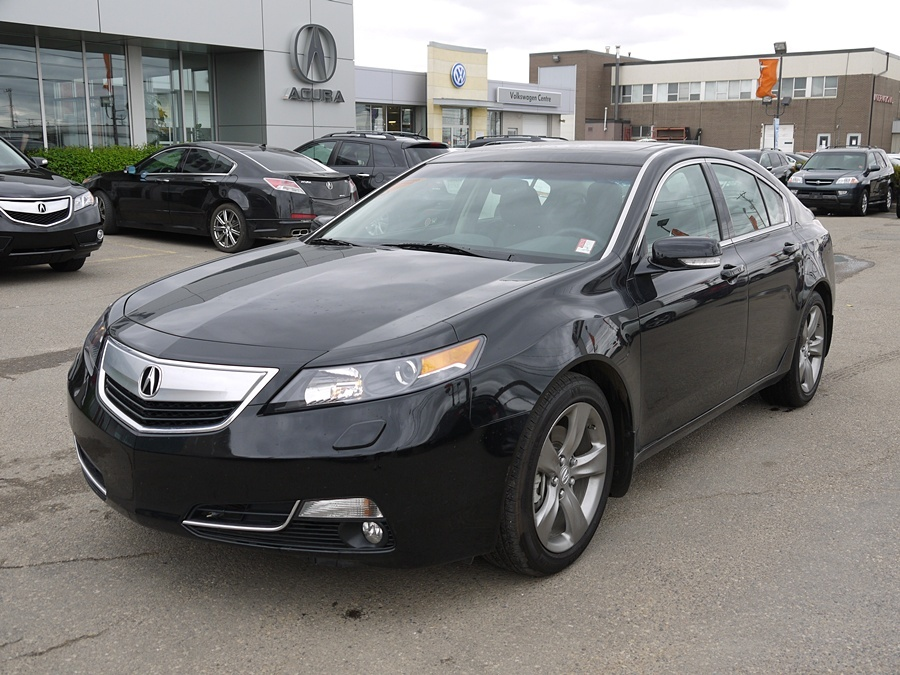

In [3]:
path = "/Users/neeravkaushal/Codes/arena_of_diffusion/stanford_cars/test/00002.jpg"
from PIL import Image
x = Image.open(path)
x

In [4]:
#x0 = pil_to_tensor(x)[None,:,:,:]
x0 = transforms.ToTensor()(x)
x0 = transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))(x0)[None,:,:,:]
x0 = x0[:,:,:28,:28]
x0.shape

torch.Size([1, 3, 28, 28])

In [5]:
my_noise_scheduler = NoiseDealer(0.0001, 0.2, 10)
print('x0:', x0.shape)
noise = torch.randn(x0.shape)
xT = my_noise_scheduler.add_noise(x0, noise, [2])
y = to_pil_image(xT[0])
y

x0: torch.Size([1, 3, 28, 28])


/Users/neeravkaushal/opt/miniconda3/envs/DL/lib/python3.8/site-packages/torchvision/transforms/functional.py:282: RuntimeWarning: invalid value encountered in cast
  npimg = (npimg * 255).astype(np.uint8)


In [6]:
noise = torch.randn(x0.shape)
xT_minus_one,_ = my_noise_scheduler.sample_image_at_previous_timestep(xT, torch.randn(xT.shape), 2)

y = to_pil_image(xT_minus_one[0])
y

In [7]:
print(x0.shape)
print(xT.shape)

torch.Size([1, 3, 28, 28])
torch.Size([1, 3, 28, 28])


In [8]:
from utils import get_sinusoidal_embeddings
Ts = torch.tensor([1,2,4], device=x0.device)
p = get_sinusoidal_embeddings(Ts, 4)
print(p.shape)
p

torch.Size([3, 4])


tensor([[ 8.4147e-01,  1.0000e-04,  5.4030e-01,  1.0000e+00],
        [ 9.0930e-01,  2.0000e-04, -4.1615e-01,  1.0000e+00],
        [-7.5680e-01,  4.0000e-04, -6.5364e-01,  1.0000e+00]])

In [9]:
from noise import NoiseDealer
from utils import get_sinusoidal_embeddings
from model import Unet

config_path = "/Users/neeravkaushal/Codes/arena_of_diffusion/model_config.yaml"
with open(config_path, 'r') as file:
    try:
        config = yaml.safe_load(file)['model_params']
    except yaml.YAMLError as exc:
        print(exc)
print(config)

{'im_channels': 2, 'im_size': 28, 'down_channels': [32, 64, 128, 256], 'mid_channels': [256, 256, 128], 'down_sample': [True, True, False], 'time_emb_dim': 128, 'num_down_layers': 1, 'num_mid_layers': 1, 'num_up_layers': 1, 'num_heads': 4, 'num_groups': 2}


In [10]:
Ts = torch.tensor([1], device=x0.device)

time_emb = get_sinusoidal_embeddings(Ts, 32)

model = Unet(config)

x0m = x0[:,:2,:,:]
model(x0m, [1]).shape

#mdb = Unet(inchn=3, outchn=6, time_emb_dim=32, up_sample = True, num_groups=1, num_heads=2, num_layers=1)

#r = model(x0, x0, time_emb)

torch.Size([1, 2, 28, 28])

In [15]:
to_pil_image(model(x0m, [1])[0])